# Introduction

- Projet final présenté par: **François Pelletier**
- Matricule: **908144032**
- Dans le cadre du cours: **IFT-7025**

# Librairies utilisées

In [1]:
import numpy as np
import load_datasets as ld
import matplotlib.pyplot as plt
import NeuralNet

## Iris Dataset

La présentation des résultats liés à ce jeu de données servira aussi à expliquer les concepts et répondre aux questions. Pour les autres jeux de données, seul les résultats et la discussion seront détaillés.

- Chargement du jeu de données

In [2]:
train1, train_labels1, test1, test_labels1 = ld.load_iris_dataset(train_ratio = 0.7)

### Choix du nombre de neurones dans la couche cachée

On doit identifier le nombre optimal de neurones dans la couche cachée dans l'intervalle $[4,50]$ pour chacun des 5 jeux de données. On itère sur chacun des jeux de validation croisée, pour chaque dimension et on calcule l'accuracy moyenne. La dimension qui a la meilleure accuracy moyenne est choisie pour construire le réseau de neurones.

In [3]:
choix_n_neurones = range(4,51)

- Pour faire la séparation du jeu de données en $k_{cv}=5$ jeux de validation croisée, on génère une permutation sur les indices du jeu d'entrainement, puis, on sépare cet ensemble en 5 groupes.

In [4]:
k_cv = 5
all_indices = range(len(train_labels1))
np.random.seed(12345)
indices_cv_test = np.sort(np.array_split(np.random.permutation(all_indices),k_cv))

In [5]:
indices_cv_test

array([[  4,   9,  13,  19,  20,  25,  33,  37,  39,  40,  44,  47,  48,
         54,  58,  62,  72,  76,  78,  87,  89],
       [  2,   6,   8,  26,  28,  30,  35,  42,  45,  50,  51,  52,  57,
         60,  63,  69,  74,  79,  90,  92,  96],
       [  0,  16,  17,  18,  21,  22,  24,  27,  32,  46,  49,  65,  66,
         68,  75,  83,  84,  85,  86,  88,  99],
       [  3,   5,  12,  15,  23,  31,  43,  53,  55,  56,  61,  64,  67,
         70,  71,  93,  94,  95,  97, 100, 104],
       [  1,   7,  10,  11,  14,  29,  34,  36,  38,  41,  59,  73,  77,
         80,  81,  82,  91,  98, 101, 102, 103]])

In [6]:
indices_cv_train = [np.setdiff1d(all_indices,indices_cv_test[i]) for i in range(k_cv)]

Ce jeux de données a trois classes possibles comme variable de sortie. On utilisera donc un réseau de neurones avec 3 neurones dans la couche de sortie, une pour chacune des valeurs possibles. Les valeurs de sortie du jeu de données sont transformées à l'aide d'un encodage binaire où la valeur de sortie est convertie en rang dans un vecteur (on commence à 0), prenant la valeur 1. Par exemple, la valeur 2 devient $[0,0,1]$.

In [7]:
accuracy_cum = []
for n_neurones in choix_n_neurones:
    accuracy_cv=[]
    for cv_set in range(k_cv):
        nn1 = NeuralNet.NeuralNet(np.array([4,n_neurones,3]),range(3))
        nn1.train(train1[indices_cv_train[cv_set]], train_labels1[indices_cv_train[cv_set]], 0.1, 1, verbose=False)
        _,accuracy,_,_,_ = nn1.test(train1[indices_cv_test[cv_set]], train_labels1[indices_cv_test[cv_set]], verbose=False)
        accuracy_cv.append(accuracy)
    accuracy_cum.append(np.mean(np.array(accuracy_cv)))

/home/francois/ift7025-projet/Code/metrics.py:40: RuntimeWarning: invalid value encountered in double_scalars
  myPrecision = cm[label_num,label_num] / sum(cm[:,label_num])


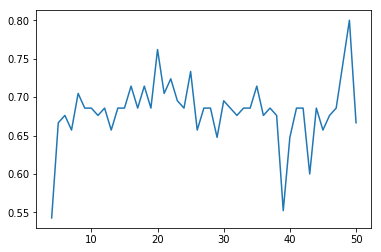

In [8]:
plt.plot(choix_n_neurones,accuracy_cum)

Le nombre de neurones qui maximise l'accuracy est de:

In [9]:
n_neurones_optimal1 = choix_n_neurones[np.where(accuracy_cum==max(accuracy_cum))[0][0]]
n_neurones_optimal1

49

### Choix du nombre de couches cachées

On choisit un nombre de 1 à 5 couches cachées. Le nombre de couche ayany l'accuracy maximale sera sélectionné pour la construction du réseau. On effectue 10 époques étant donné la taille des réseaux à entrainer.

In [27]:
choix_n_couches = range(1,6)

In [21]:
accuracy_cum = []
lc_cum = []
for n_couches in choix_n_couches:
    accuracy_cv=[]
    nn1 = NeuralNet.NeuralNet(np.hstack((4,np.repeat(n_neurones_optimal1,n_couches),3)),range(3))
    lc = nn1.train(train1, train_labels1, 0.1, 10, verbose=False)
    lc_cum.append(lc)
    _,accuracy,_,_,_ = nn1.test(train1, train_labels1, verbose=False)
    accuracy_cv.append(accuracy)
    accuracy_cum.append(np.mean(np.array(accuracy_cv)))
lc_cum = np.array(lc_cum)

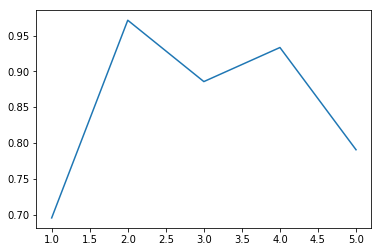

In [15]:
plt.plot(choix_n_couches,accuracy_cum)

Le nombre de couches cachées qui maximise l'accurary est de:

In [32]:
n_couches_optimal1 = choix_n_couches[np.where(accuracy_cum==max(accuracy_cum))[0][0]]
n_couches_optimal1

4

### Courbes d'apprentissage

Ce graphique présente les courbes d'apprentissage pour chacun des niveaux de profondeur du réseau

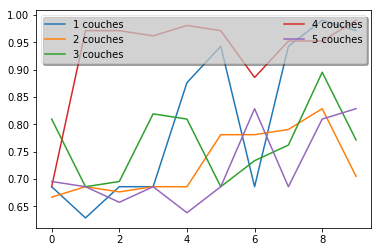

In [31]:
plt.subplot(111)
for i in choix_n_couches:
    plt.plot(range(10),lc_cum[i-1], label="%d couches"%(i,))
leg = plt.legend(loc='best', ncol=2, mode="expand", shadow=True, fancybox=True)
leg.get_frame().set_alpha(0.5)

### Choix des poids initiaux
Les poids initiaux ont été choisis à partir d'une distribution uniforme sur $[-1,1]$. On compare ici les courbes d'apprentissage en initialisant les poids à 0 et en initialisant les poids aléatoirement, pour le réseau de dimension et de profondeur optimale sélectionnées précédemment.

### Entrainement et tests
On reprend les résultats du dernier entrainement, puisqu'il utilise les poids aléatoires et les hyperparamètres optimaux.